In [1]:
import numpy as np
import pandas as pd


In [2]:
sales_by_month=pd.read_csv("/norway_new_car_sales_by_month.csv",encoding = 'unicode_escape')

In [3]:
sales_by_month_2= sales_by_month[sales_by_month['Year']>=2011]

In [4]:
sales_by_month_2= sales_by_month_2.reset_index()
sales_by_month_2.drop(['index'],axis=1)
sales_by_month_2[['Quantity','Quantity_Diesel','Quantity_Electric']].describe()

,Quantity,Quantity_Diesel,Quantity_Electric
count,73.000000,73.000000,73.000000
mean,12068.616438,6200.780822,1154.109589
std,1069.811972,1627.308986,875.792142
min,9369.000000,3422.000000,43.000000
25%,11322.000000,4959.000000,309.000000
50%,11986.000000,6021.000000,1260.000000
75%,12893.000000,7260.000000,1906.000000
max,14207.000000,10027.000000,3391.000000


In [5]:
sales_by_month_2['Year_2']=sales_by_month_2['Year']

In [6]:
sales_by_month_2.set_index('Year')

,index,Month,Quantity,Quantity_YoY,Import,Import_YoY,Used,Used_YoY,Avg_CO2,Bensin_Co2,Diesel_Co2,Quantity_Diesel,Diesel_Share,Diesel_Share_LY,Quantity_Hybrid,Quantity_Electric,Import_Electric,Year_2
Year,,,,,,,,,,,,,,,,,,
2011,48,1,10372,675,1765,50,NaN,NaN,135,132,138,7260,70.0,71.9,439.0,112.0,NaN,2011
2011,49,2,10543,1449,1949,-35,NaN,NaN,137,132,140,7949,75.4,74.1,257.0,124.0,NaN,2011
2011,50,3,12901,1415,2237,-294,NaN,NaN,136,132,141,9353,72.5,74.3,466.0,248.0,NaN,2011
2011,51,4,11330,653,2170,-378,NaN,NaN,136,132,139,8509,75.1,72.9,388.0,133.0,NaN,2011
2011,52,5,13005,3109,2428,-67,NaN,NaN,134,132,136,10027,77.1,72.8,357.0,146.0,NaN,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,116,9,13854,1433,1526,-373,42780.0,236.0,88,98,128,3838,27.7,39.3,3991.0,2629.0,517.0,2016
2016,117,10,11932,-1265,1365,-443,39797.0,-1611.0,91,98,127,3544,29.7,39.7,3209.0,1861.0,486.0,2016
2016,118,11,13194,594,1305,-233,39721.0,2246.0,88,100,128,3892,29.5,39.7,3181.0,2567.0,502.0,2016


In [7]:
sales_by_month_2["Year_2"] = sales_by_month_2["Year_2"].astype(str)
sales_by_month_2["Month"] = sales_by_month_2["Month"].astype(str)
sales_by_month_2["Date"] = sales_by_month_2["Year_2"].str.cat(
    sales_by_month_2["Month"].str.zfill(2), sep="-"
)

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

res = seasonal_decompose(sales_by_month_2.Quantity_Electric, period=12)
df = {
    "observed": res.observed,
    "trend": res.trend,
    "seasonal": res.seasonal,
    "resid": res.resid,
}
res = pd.DataFrame(df)

In [9]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Defining variables
fig = make_subplots(shared_xaxes=True,rows=4, cols=1)
x = sales_by_month_2.Date
y = res.observed
z =res.trend
k =res.seasonal
w =res.resid

# Ploting the lines
fig.append_trace(go.Scatter(
    x=x,
    y=y,
), row=1, col=1)

fig.append_trace(go.Scatter(
    x=x,
    y=z,
), row=2, col=1)

fig.append_trace(go.Scatter(
    x=x,
    y=k
), row=3, col=1)

fig.append_trace(go.Scatter(
    x=x,
    y=w
), row=4, col=1)

# Update properties and descriptions
fig.update_layout(height=700, width=700, title_text="Quantity Electric- Decompose")
fig.update_xaxes(title_text="Date", row=4, col=1)
fig.update_yaxes(title_text="Observed", row=1, col=1)
fig.update_yaxes(title_text="Trend", row=2, col=1)
fig.update_yaxes(title_text="Seasonal", row=3, col=1)
fig.update_yaxes(title_text="Resid/Noise", row=4, col=1)
fig.show()

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

res = seasonal_decompose(sales_by_month_2.Quantity_Diesel, period=12)
df = {
    "observed": res.observed,
    "trend": res.trend,
    "seasonal": res.seasonal,
    "resid": res.resid,
}
res = pd.DataFrame(df)

In [11]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Defining variables
fig = make_subplots(shared_xaxes=True,rows=4, cols=1)
x = sales_by_month_2.Date
y = res.observed
z =res.trend
k =res.seasonal
w =res.resid

# Ploting the lines
fig.append_trace(go.Scatter(
    x=x,
    y=y,
), row=1, col=1)

fig.append_trace(go.Scatter(
    x=x,
    y=z,
), row=2, col=1)

fig.append_trace(go.Scatter(
    x=x,
    y=k
), row=3, col=1)

fig.append_trace(go.Scatter(
    x=x,
    y=w
), row=4, col=1)

# Update properties and descriptions
fig.update_layout(height=700, width=700, title_text="Quantity Diesel- Decompose")
fig.update_xaxes(title_text="Date", row=4, col=1)
fig.update_yaxes(title_text="Observed", row=1, col=1)
fig.update_yaxes(title_text="Trend", row=2, col=1)
fig.update_yaxes(title_text="Seasonal", row=3, col=1)
fig.update_yaxes(title_text="Resid/Noise", row=4, col=1)
fig.show()

In [12]:
# Split into train and test set
train_sales = sales_by_month_2[:51] 
test_sales = sales_by_month_2[51:]

In [13]:
train_sales.set_index('Year')

,index,Month,Quantity,Quantity_YoY,Import,Import_YoY,Used,Used_YoY,Avg_CO2,Bensin_Co2,Diesel_Co2,Quantity_Diesel,Diesel_Share,Diesel_Share_LY,Quantity_Hybrid,Quantity_Electric,Import_Electric,Year_2,Date
Year,,,,,,,,,,,,,,,,,,,
2011,48,1,10372,675,1765,50,NaN,NaN,135,132,138,7260,70.0,71.9,439.0,112.0,NaN,2011,2011-01
2011,49,2,10543,1449,1949,-35,NaN,NaN,137,132,140,7949,75.4,74.1,257.0,124.0,NaN,2011,2011-02
2011,50,3,12901,1415,2237,-294,NaN,NaN,136,132,141,9353,72.5,74.3,466.0,248.0,NaN,2011,2011-03
2011,51,4,11330,653,2170,-378,NaN,NaN,136,132,139,8509,75.1,72.9,388.0,133.0,NaN,2011,2011-04
2011,52,5,13005,3109,2428,-67,NaN,NaN,134,132,136,10027,77.1,72.8,357.0,146.0,NaN,2011,2011-05
2011,53,6,10354,-765,2220,-454,NaN,NaN,135,134,137,8024,77.5,74.9,215.0,84.0,NaN,2011,2011-06
2011,54,7,11189,-318,2719,-464,NaN,NaN,134,132,135,8560,76.5,76.3,293.0,43.0,NaN,2011,2011-07
2011,55,8,11464,1050,2547,-124,NaN,NaN,132,131,134,8541,74.5,73.6,303.0,138.0,NaN,2011,2011-08
2011,56,9,11737,600,2661,-62,NaN,NaN,132,129,136,8756,74.6,74.3,353.0,201.0,NaN,2011,2011-09


In [14]:
#Quantity_Hybrid
#Small trend, seasonality: trend- mul, seasonal- add

#Quantity_Electric
#Trend,seasonality: trend- add, seasonal- mul

#Quantity_Diesel
#Trend,seasonality: trend: add, seasonal- mul

#Quantity 
#Huge trend, seasonality: trend:mul, seasonal- add

In [15]:
# holt winters 
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   # single exponential smoothing as in ewm of pandas
from statsmodels.tsa.holtwinters import ExponentialSmoothing # double and triple exponential smoothing 

In [16]:
fitted_model_diesel = ExponentialSmoothing(train_sales['Quantity_Diesel'],trend= 'add',seasonal='mul',seasonal_periods=12).fit()
fitted_model_electric= ExponentialSmoothing(train_sales['Quantity_Electric'],trend= 'add',seasonal='mul',seasonal_periods=12).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning:

After 0.13 initialization must be handled at model creation



In [17]:
test_predictions_diesel = fitted_model_diesel.forecast(22).rename('HW Test Forecast Diesel')
test_predictions_electric = fitted_model_electric.forecast(22).rename('HW Test Forecast Electric')

In [18]:
list_pred_diesel= test_predictions_diesel.tolist()
list_pred_electric= test_predictions_electric.tolist()

In [19]:
list_test_diesel=test_sales['Quantity_Diesel'].tolist()
list_test_electric=test_sales['Quantity_Electric'].tolist()


In [20]:
# Split into train and test set- Quantity Electric
train_sales = sales_by_month_2[:73] 
#test_sales = sales_by_month_2[103:] 
fitted_model = ExponentialSmoothing(train_sales['Quantity_Electric'],trend= 'add',seasonal='mul',seasonal_periods=12).fit()
test_predictions = fitted_model.forecast(36).rename('HW Test Forecast')

list_pred= test_predictions.tolist()

In [21]:
# Split into train and test set- Quantity Diesel
train_sales = sales_by_month_2[:73] 
#test_sales = sales_by_month_2[103:] 
fitted_model = ExponentialSmoothing(train_sales['Quantity_Diesel'],trend= 'add',seasonal='mul',seasonal_periods=12).fit()
test_predictions = fitted_model.forecast(36).rename('HW Test Forecast')

list_pred= test_predictions.tolist()

In [24]:
predictions= pd.read_excel('/Prediction values.xlsx')

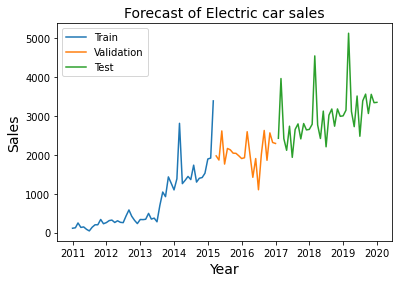

In [25]:
import matplotlib.pyplot as plt
plt.plot(predictions['Date'],predictions['Quantity_Electric'])
plt.plot(predictions['Date'],predictions['Test_Electric'])
plt.plot(predictions['Date'],predictions['Pred_electric'])
plt.title('Forecast of Electric car sales', fontsize=14)
plt.legend(['Train','Validation', 'Test'])
plt.xlabel('Year', fontsize=14)
plt.ylabel('Sales', fontsize=14)

plt.show()

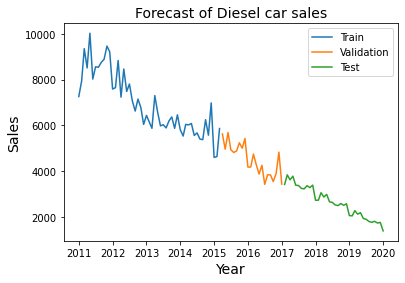

In [26]:
plt.plot(predictions['Date'],predictions['Quantity_Diesel'])
plt.plot(predictions['Date'],predictions['Test_Diesel'])
plt.plot(predictions['Date'],predictions['Pred_diesel'])
plt.title('Forecast of Diesel car sales', fontsize=14)
plt.legend(['Train','Validation', 'Test'])
plt.xlabel('Year', fontsize=14)
plt.ylabel('Sales', fontsize=14)

plt.show()

In [28]:
# calculate manually- Electric
arr_test = np.array(list_test_electric)
arr_pred = np.array(list_pred_electric)


d = arr_test - arr_pred
mse_f = np.mean(d**2)
mae_f = np.mean(abs(d))
rmse_f = np.sqrt(mse_f)
r2_f = 1-(sum(d**2)/sum((arr_test-np.mean(arr_pred))**2))
mape= np.mean(np.abs((arr_test- arr_pred) / arr_test))

print("Results by manual calculation:")
print("MAE:",mae_f)
print("MSE:", mse_f)
print("RMSE:", rmse_f)
print("R-Squared:", r2_f)
print("MAPE_Electric:",mape)

Results by manual calculation:
MAE: 320.9702054968362
MSE: 173311.1796853933
RMSE: 416.30659337247266
R-Squared: -0.14505451084391163
MAPE_Electric: 0.15407085929535988


In [29]:
# calculate manually- Diesel
arr_test = np.array(list_test_diesel)
arr_pred = np.array(list_pred_diesel)


d = arr_test - arr_pred
mse_f = np.mean(d**2)
mae_f = np.mean(abs(d))
rmse_f = np.sqrt(mse_f)
r2_f = 1-(sum(d**2)/sum((arr_test-np.mean(arr_pred))**2))
mape= np.mean(np.abs((arr_test- arr_pred) / arr_test))

print("Results by manual calculation:")
print("MAE:",mae_f)
print("MSE:", mse_f)
print("RMSE:", rmse_f)
print("R-Squared:", r2_f)
print("MAPE_Diesel:",mape)

Results by manual calculation:
MAE: 536.398482952659
MSE: 433095.6097037611
RMSE: 658.0999997749286
R-Squared: 0.3717117785972317
MAPE_Diesel: 0.13192570177607624


# New Section